## HW_3_ASSIGNMENT 3 
### Author Anita Ahmed - ama908@nyu.edu
#### Other Team Members : Erwan LeCun, Miyabi Ishihara

### PROPOSAL
#### We want to test if in any given month the averge tripduration per customer (u1) and averge tripduration per subscribers(u2) are equal

#### Sample used : January 2015, Citibike data

#### Null Hypothesis: The averge tripduration per customer (u1) and averge tripduration persubscribers(u2), in are equal at a significnace level p = 0.025
##### Ho: u1-u2 = 0
#### Alternetive Hypothesis: The averge tripduration per customer (u1) and averge tripduration persubscribers(u2)
##### Ha: u1-u2 ≠ 0
##### α =0.025

Populating the interactive namespace from numpy and matplotlib


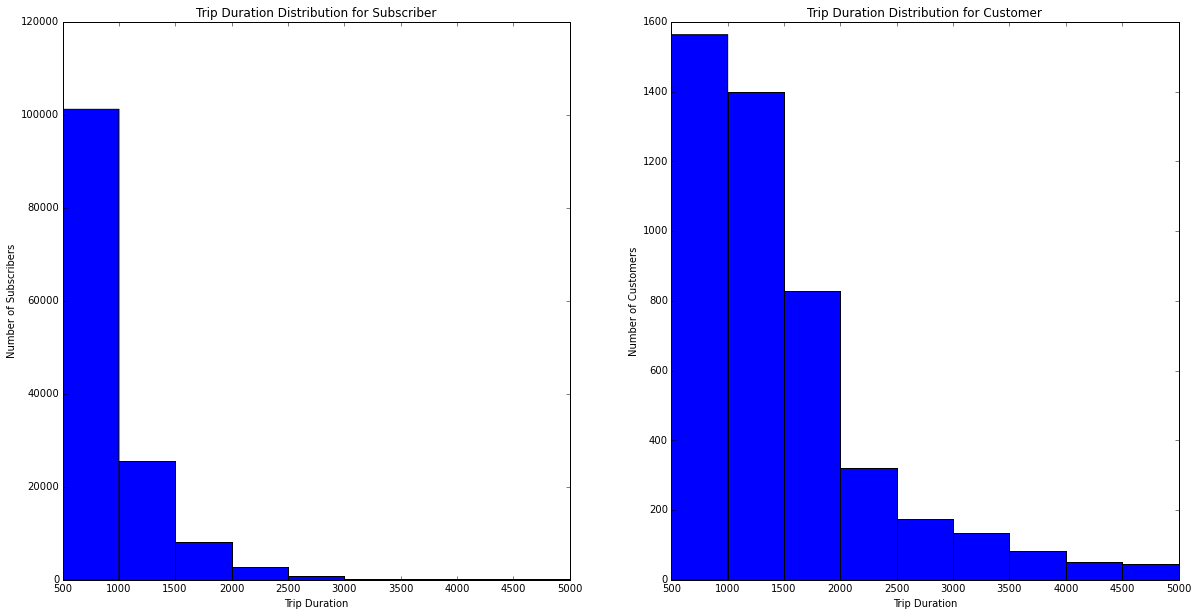

In [1]:
#IMPORTING PACKAGES
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats
import os
import json
from zipfile import ZipFile
from StringIO import StringIO
import urllib2

%pylab inline

#Reading The CSV File for the month of Januray, 2015 
r = urllib2.urlopen("https://s3.amazonaws.com/tripdata/201501-citibike-tripdata.zip").read()
file = ZipFile(StringIO(r))
citibike_csv = file.open("201501-citibike-tripdata.csv")
df = pd.read_csv(citibike_csv)

# Separating Usertypes by creating array
trip_subscriber = []
trip_customer = []

# Creating seprate tripduration array per usertype
for index, row in df.iterrows():
        if row['usertype'] == 'Subscriber':
                trip_subscriber.append(row['tripduration'])
        elif row['usertype'] == 'Customer':
                trip_customer.append(row['tripduration'])

# Visalizing Trip Duration for each usertype
bins = range(500, 5500, 500)
trip_subscriber = np.array(trip_subscriber)
trip_customer = np.array(trip_customer)
fig = pl.figure(figsize=[20,10])
ax1 = fig.add_subplot(121)
ax1.hist(trip_subscriber, bins = bins)
ax2 = fig.add_subplot(122)
ax2.hist(trip_customer, bins = bins)
ax1.set_ylabel('Number of Subscribers')
ax1.set_xlabel('Trip Duration')
ax2.set_ylabel('Number of Customers')
ax2.set_xlabel('Trip Duration')
ax1.set_title('Trip Duration Distribution for Subscriber')
ax2.set_title('Trip Duration Distribution for Customer')
pl.show()

#####CONDUTCING Z-test
###### x1= sample mean tripduration for Customers
######x2= sample mean tripduration for Subscribers
###### u1= population mean tripduration for Customers
###### u2= population mean tripduration for Subscribers
###### o1= sample variance tripduration for Customers
###### o2= sample variance tripduration for Subscribers
###### n1= sample size for Customers
###### n2= sample size for Subscribers

In [2]:
alpha = 0.025
z_test = lambda x1, x2, u1, u2, o1, o2, n1, n2: ((x1 - x2) - (u1 - u2)) / np.sqrt((o1 / n1) + (o2 / n2))
z_sample = z_test(np.average(trip_customer), np.average(trip_subscriber), 0, 0, np.var(trip_customer), np.var(trip_subscriber), len(trip_customer), len(trip_subscriber))
print 'The z-score of the distribution is:',z_sample

The z-score of the distribution is: 33.7877558335


In [3]:
# For two tailed z-test,we select α=0.025, the critical z-value is 1.96. 
z_critical = 1.96
def report_result(z_sample,z_critical):
    print 'is the z value {0:.2f} larger than the critical value {1:.2f}? '.format(z_sample,z_critical)
    if z_sample>z_critical:
        print "YES!"
    else: print "NO!"
    
    print 'the Null hypothesis is {}'.format( 'rejected' if z_sample>z_critical  else 'not rejected') 
    
report_result(z_sample,z_critical)

is the z value 33.79 larger than the critical value 1.96? 
YES!
the Null hypothesis is rejected


####The Z score was very large as the sample sizes of subscriber sample size is significantly larger than the customer sample size. We rejected the NULL Hypothesis that the mean ride time for subscriber and customer is equal. 

####Now we want to check the data with a differnt NULL hypothesis, so we decided to conduct the Chi-Sq test. 

###CHI-SQ Test

###PROPOSAL : We want to test if Subscriber takes longer rides than Customers. For that we divide the trip duration as long ride and short ride. Long ride is anything more than or equal to 10 minutes. Short ride is less than 10 minutes. We are conduting the test at a significnace level p = 0.05


####Null Hypothesis: The probability of Subscriber taking long rides (P0) is higher than or equal to the probability of Customer taking long rides (P1).Testing at a significnace level p = 0.05

#####Ho: P0-P1 ≥ 0

####Alternetive Hypothesis: The proportion of Subscriber taking long rides (P0) is lower than the proportion of Customer taking long rides (P1).

#####Ha: P0-P1 < 0

#####α =0.05


In [4]:
# Sorting Data to Count Number of Subcribers and Customers taking short and long rides.

#dividing usertype by Customer and Subscriber
subscriber = df[df.usertype=='Subscriber']
customers = df[df.usertype=='Customer']

#Sorting Subcribers who ride bike for more than or equal to 10 minutes and less than 10 minutes  
subscribers_l = subscriber[subscriber.tripduration >= 600]
subscribers_s = subscriber[subscriber.tripduration < 600]

#Sorting Customer who ride bike for more than or equal to 10 minutes and less than 10 minutes 
customers_l = customers[customers.tripduration >= 600]
customers_s= customers[customers.tripduration <600]

#Calculating total# of long trips, short trips and alltrips
Long_trips = len(customers_l) + len(subscribers_l)
Short_trips = len(subscribers_s) + len(customers_s)
Total_Trips =  Long_trips + Short_trips


In [5]:
print "The Number of Subscriber riding more than 10 mintues:", len(subscribers_l)
print "The Number of Subscriber riding less than 10 mintues:", len(subscribers_s)
print "The Number of Customer riding more than 10 mintues:", len(customers_l)
print "The Number of Customer riding less than 10 mintues:", len(customers_s)
print "The total Number of Users Riding more than or equal to 10 minutes:", Long_trips 
print "The total Number of Users Riding less than 10 minutes:", Short_trips
print "Total number or trips taken by all Users:", Total_Trips


The Number of Subscriber riding more than 10 mintues: 106381
The Number of Subscriber riding less than 10 mintues: 173543
The Number of Customer riding more than 10 mintues: 4487
The Number of Customer riding less than 10 mintues: 1141
The total Number of Users Riding more than or equal to 10 minutes: 110868
The total Number of Users Riding less than 10 minutes: 174684
Total number or trips taken by all Users: 285552


In [6]:
#Formulating the Chi-Square Statistic

Ntot = Total_Trips
expected = Long_trips*Short_trips*len(customers)*len(subscriber)
sample_values = [len(customers_l),len(subscribers_l)],[len(customers_s),len(subscribers_s)]
 
chisqstat= lambda N, values, expect : N*((values[0][0]*values[1][1]-values[0][1]*values[1][0])**2)/(expect)

Chi_Square_Statistic=chisqstat(Ntot,  sample_values, expected)

print "The Chi-Square Staistic Value is:", Chi_Square_Statistic


The Chi-Square Staistic Value is: 4043


In [7]:
# Reading Value off the Chi-Square Table @ df=1 and p=0.05

Critical_Value= 3.84

def report_result(p,a):
    print 'is the Critical value {0:.2f} lower than the Chi-Square Score value {1:.2f}?'.format(Critical_Value,Chi_Square_Statistic)
    if p<a:
        print "YES!"
    else: print "NO!"
    
    print 'the Null hypothesis is {}'.format( 'rejected' if p<a  else 'not rejected') 
    
report_result(Critical_Value,Chi_Square_Statistic)

is the Critical value 3.84 lower than the Chi-Square Score value 4043.00?
YES!
the Null hypothesis is rejected


Since Chi-square Value is greater than 3.84 we will reject the null hypothesis. Therefore, the probability of Subscriber taking long rides is lower than the probability of Customer taking long rides. This probably is due to the fact that Subcribers are locals who tend to use bikes for daily commute where as Customers might be tourists who are riding the bikes longer for sightseeing.
